In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import seaborn; seaborn.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**# PART 1**

In [36]:
advertising = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS/LAB EVAL 4/advertising.csv')
advertising

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


# **1.**

# (a) Draw a scatter plot of money spent on TV advertisements versus sales

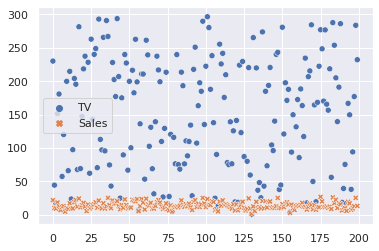

In [37]:
sns.scatterplot(data=advertising[['TV','Sales']])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


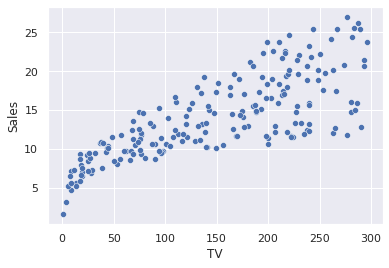

In [38]:
sns.scatterplot(advertising.TV,advertising.Sales)

# (b) Pair plots and Heatmap.


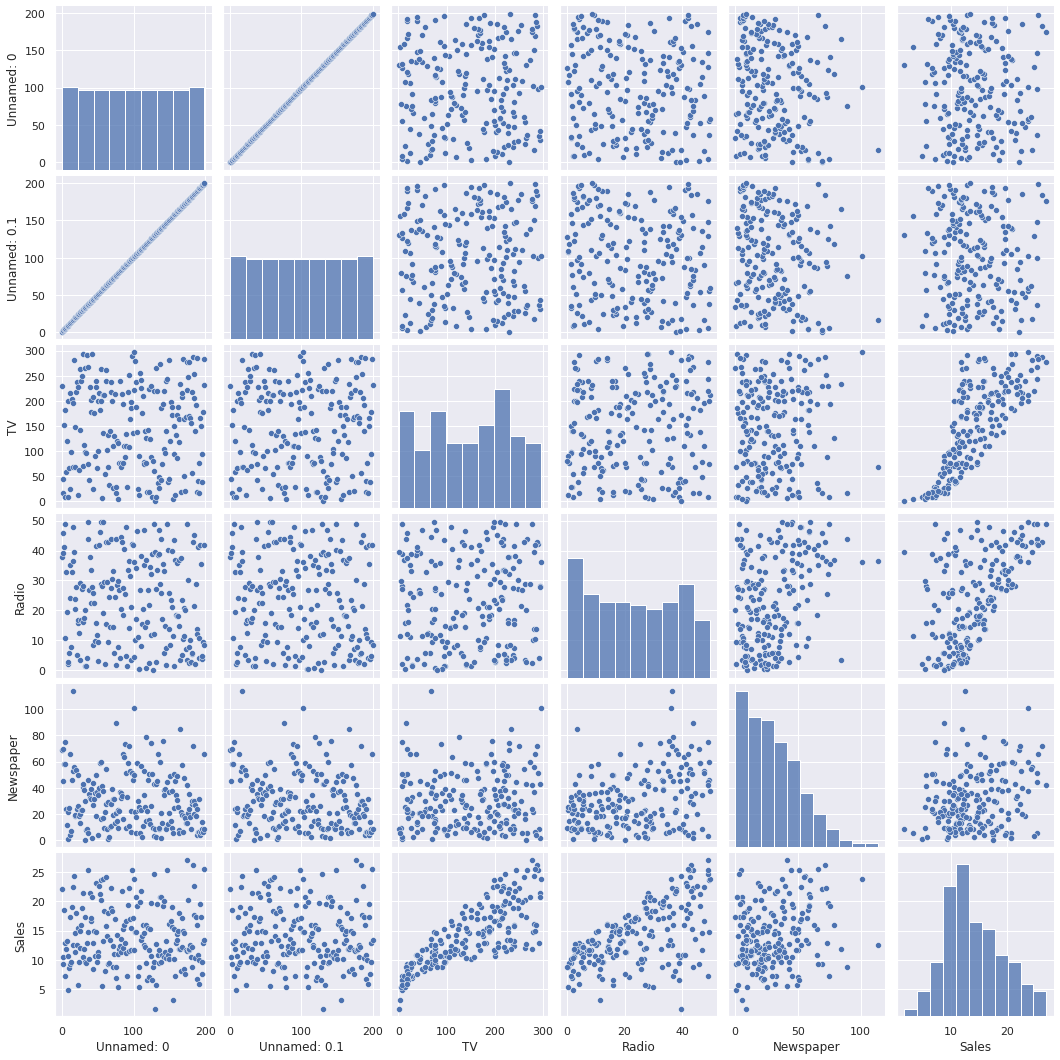

In [39]:
sns.pairplot(data=advertising)

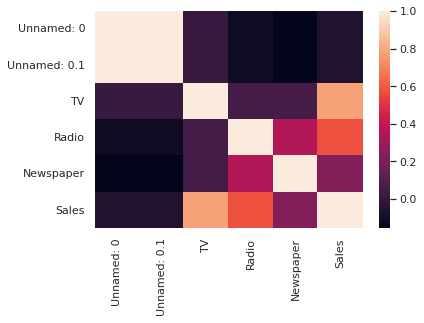

In [40]:
sns.heatmap(advertising.corr())

# **2.** Develop a Linear Regression model based on money spent on TV advertisements versus Sales.


In [41]:
from sklearn.model_selection import train_test_split
y = advertising["TV"]
X = advertising[["Sales"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = lm.predict(X_test)
y_pred

array([185.59376702, 255.47203706, 242.76689705,  63.62442295,
       284.69385907, 130.96166499, 254.20152306,  77.60007696,
       116.98601098, 160.18348701,  91.57573097,  81.41161896,
       122.06806699,  38.21414294, 101.73984297, 119.52703898,
        40.75517094, 181.78222502, 114.44498298, 211.00404703,
       221.16815904, 129.69115099, 109.36292698, 252.93100905,
        89.03470297,  73.78853496, 246.57843905, 141.125777  ,
       105.55138498,  43.29619894, 105.55138498, 114.44498298,
       271.98871906,  81.41161896, 175.42965501, 233.87329904,
       118.25652498, 235.14381305, 122.06806699,  58.54236695])

In [44]:
m=lm.coef_
c=lm.intercept_
print("Slope",m)
print("Intercept",c)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Slope [12.70514001]
Intercept -29.123099095137064
MAE: 43.17493689003086
MSE: 2674.894841017676
RMSE: 51.71938554369798


# **3.** With the regression line so developed, predict the sales that can be anticipated based on the money spent on TV advertisements.


In [45]:
print(y_pred)

[185.59376702 255.47203706 242.76689705  63.62442295 284.69385907
 130.96166499 254.20152306  77.60007696 116.98601098 160.18348701
  91.57573097  81.41161896 122.06806699  38.21414294 101.73984297
 119.52703898  40.75517094 181.78222502 114.44498298 211.00404703
 221.16815904 129.69115099 109.36292698 252.93100905  89.03470297
  73.78853496 246.57843905 141.125777   105.55138498  43.29619894
 105.55138498 114.44498298 271.98871906  81.41161896 175.42965501
 233.87329904 118.25652498 235.14381305 122.06806699  58.54236695]


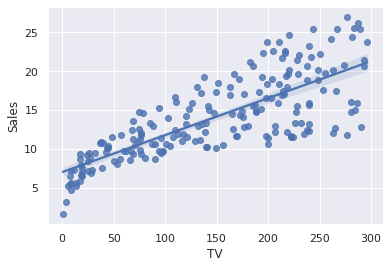

In [46]:
sns.regplot(data=advertising,x="TV",y="Sales")

#**4.** Draw the Regression Line superimposing on the data 

In [57]:
import statsmodels.api as sm
X = advertising["TV"]
y = advertising["Sales"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
predictions = model.predict(X)

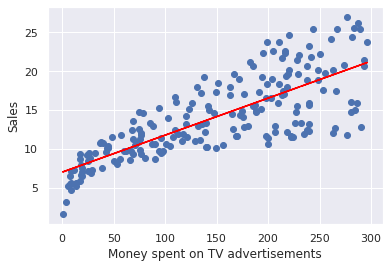

In [60]:
plt.scatter(advertising["TV"], advertising["Sales"])
plt.plot(advertising["TV"], predictions, color="red")
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

# **5.** Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and residuals employing libraries of statsmodel. Comment on the heteroscedasticit

In [61]:
model = sm.OLS(y, X)
results = model.fit()

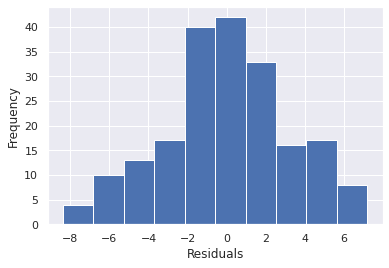

In [62]:
#residuals
residuals = y - results.predict(X)
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [63]:
# Comment on the heteroscedasticity
if abs(residuals).mean() > 0.5:
    print("There may be heteroscedasticity in the data. It is worth investigating further.")
else:
    print("There does not appear to be heteroscedasticity in the data.")

There may be heteroscedasticity in the data. It is worth investigating further.


# **Part 2**

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS/LAB EVAL 4/pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [48]:
df.shape

(767, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
df.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [67]:
y = df["1"]

In [69]:
df = df.drop("1", axis = 'columns')

In [70]:
df

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [71]:
#Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df)
scaled_data = scaler.transform(df)

In [72]:
scaled_data

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import math
count_neighbor = math.sqrt(767)
count_neighbor

27.694764848252458

In [74]:
model =  KNeighborsClassifier(n_neighbors = 27)

In [75]:
#80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2) 

In [76]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [77]:
output = model.predict(X_test)
output

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

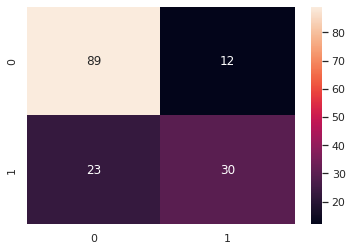

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, output)
sns.heatmap(cm, annot = True)

In [79]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

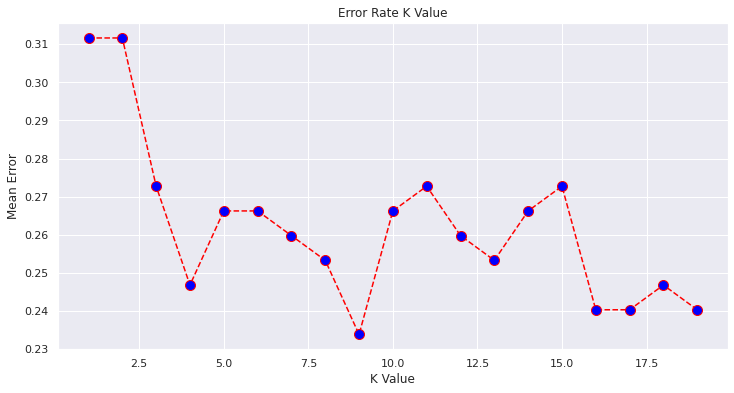

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')